```
         Copyright Rein Halbersma 2018-2020.
Distributed under the Boost Software License, Version 1.0.
   (See accompanying file LICENSE_1_0.txt or copy at
         http://www.boost.org/LICENSE_1_0.txt)
```

# Common Stratego Game Setups by Piece

## 1. Reproducing Dobby125's [blog post](http://stratego-tips.blogspot.com/2017/04/common-stratego-piece-placements.html)

In [1]:
from IPython.display import display, HTML

import gravon.package as pkg
from gravon.piece import Rank, rank_names
from gravon.stats import setup_placement
from gravon.plots import setup_heatmap1

db_setups = pkg.load_dataset('db_setups')

In [2]:
classic_xml = db_setups.query('type == "classic" & ext == ".xml"')
sum, mean = setup_placement(classic_xml, ['sum', 'mean'])
ranks = list(reversed(range(Rank._1, Rank._B))) + [ Rank._B, Rank._F ]

The charts below show Stratego piece placements from 84,956 setups.



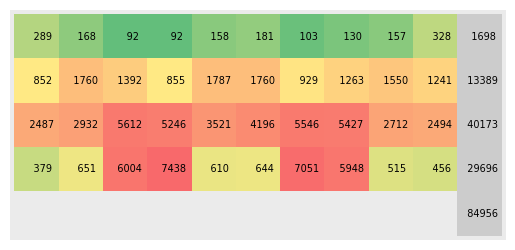

<ggplot: (8747466418529)>


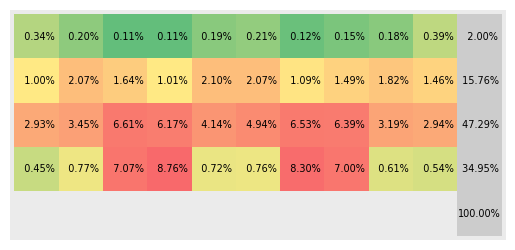

<ggplot: (8747466374620)>


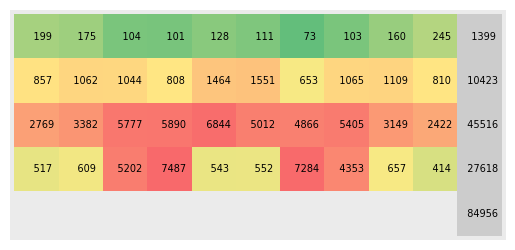

<ggplot: (8747466403690)>


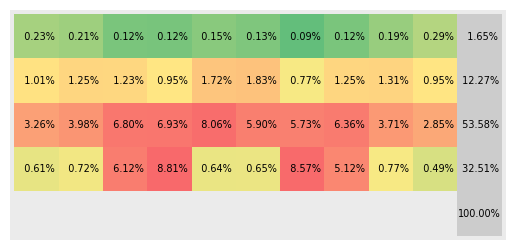

<ggplot: (8747465144182)>


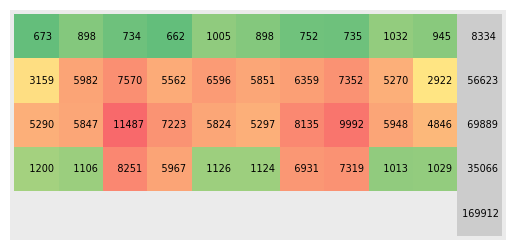

<ggplot: (8747464953872)>


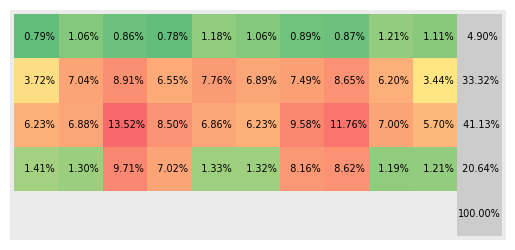

<ggplot: (8747465190355)>


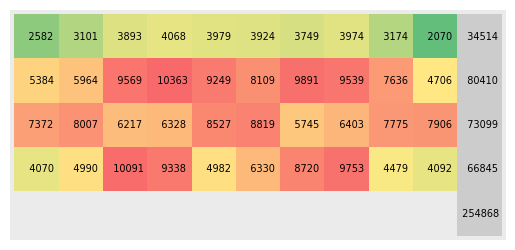

<ggplot: (8747464969201)>


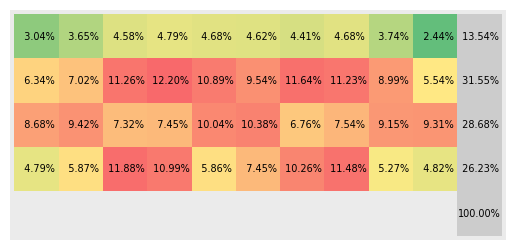

<ggplot: (8747464704895)>


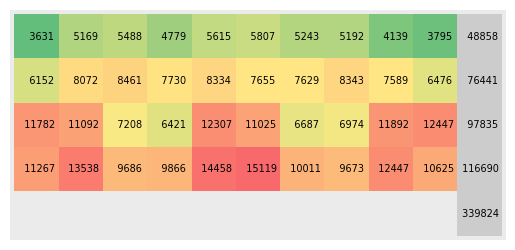

<ggplot: (8747464583602)>


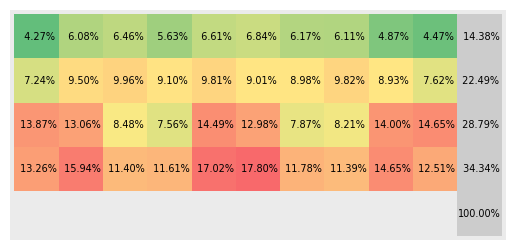

<ggplot: (8747464559692)>


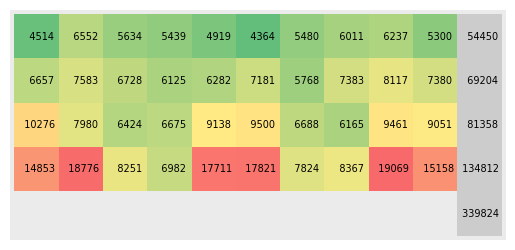

<ggplot: (8747465549421)>


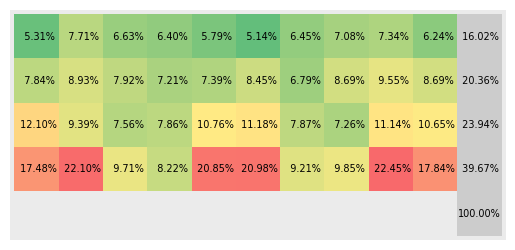

<ggplot: (8747464568619)>


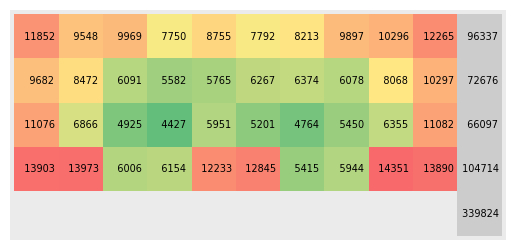

<ggplot: (8747465194370)>


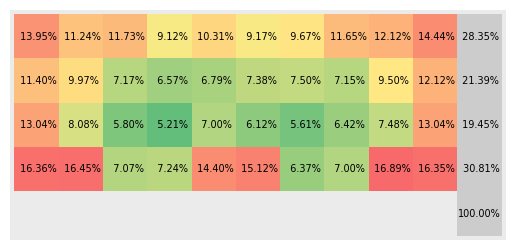

<ggplot: (8747453734635)>


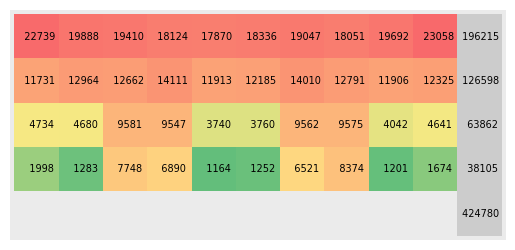

<ggplot: (8747465121624)>


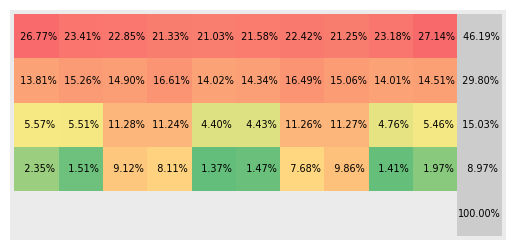

<ggplot: (8747464644943)>


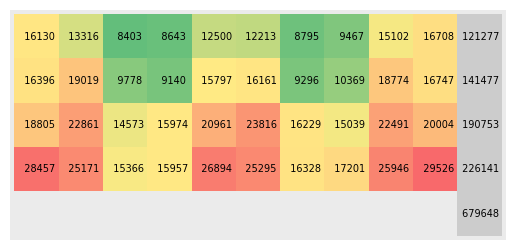

<ggplot: (8747453735921)>


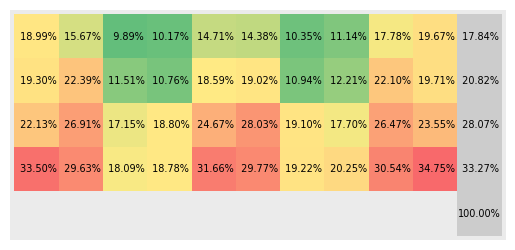

<ggplot: (8747464036509)>


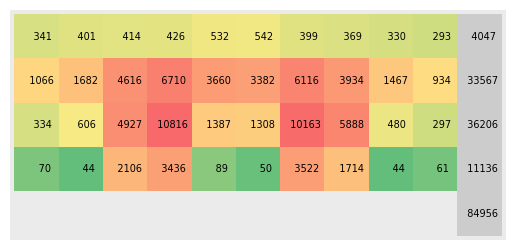

<ggplot: (8747464559815)>


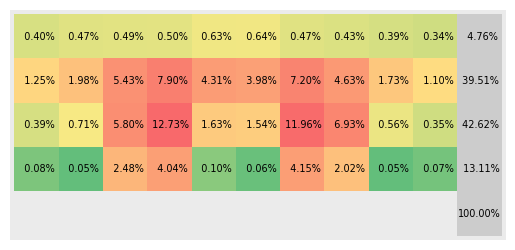

<ggplot: (8747466601015)>


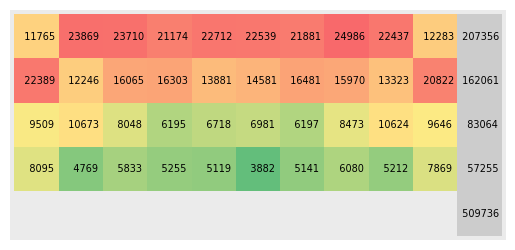

<ggplot: (8747462985135)>


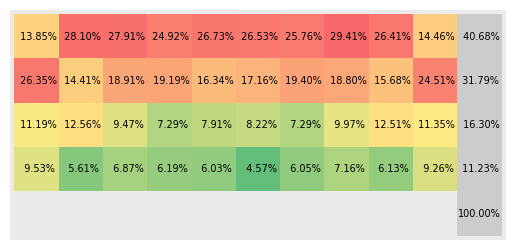

<ggplot: (8747466489878)>


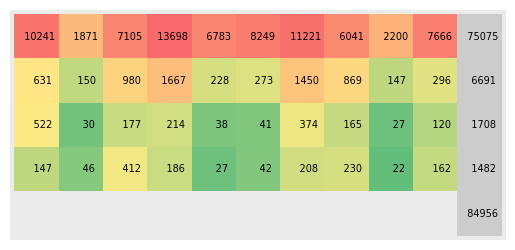

<ggplot: (8747462692581)>


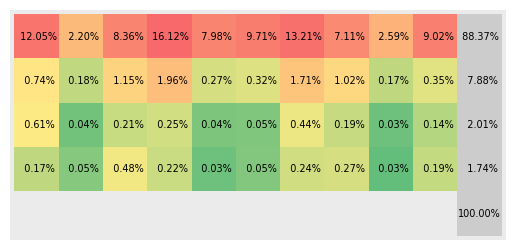

<ggplot: (8747464648641)>


In [3]:
print(f'The charts below show Stratego piece placements from {classic_xml.shape[0]:,} setups.\n')
for r in ranks:
    display(HTML(f'<h3>Common Stratego {rank_names[r].capitalize()} Placement</h3>'))
    print(setup_heatmap1( sum[r], format_string='{:>7}',    axis_text=False, margins=(0,), margin_fill=False, normalize=False, rotate=True))
    print(setup_heatmap1(mean[r], format_string='{:>7.2%}', axis_text=False, margins=(0,), margin_fill=False, normalize=True,  rotate=True))

## 2. Improvements

We make the following improvements: 
- First, we include all Gravon games, both in the .gsn and .xml formats. This increases the number of setups to over a hundred thousand. 
- Second, we provide column totals. These are similar in nature to the row totals (i.e. normalized for percentages).
- Third, we use heatmap colors for the row and column totals as well. This visualizes the spread of piece placement over rows and columns.
- Finally, we rotate the board and provide square coordinates (1...4 for rows and a...j for columns). This makes the figures unambiguous.

In [4]:
classic = db_setups.query('type == "classic"')
sum, mean = setup_placement(classic, ['sum', 'mean'])

The charts below show Classic Stratego piece placements from 102,676 setups.



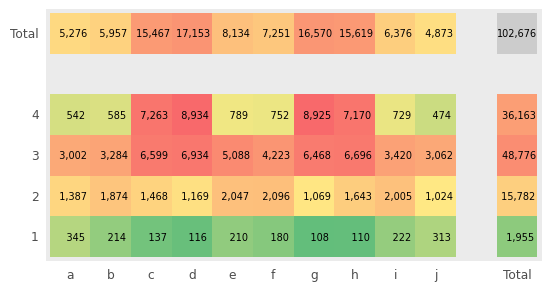

<ggplot: (8747464464333)>


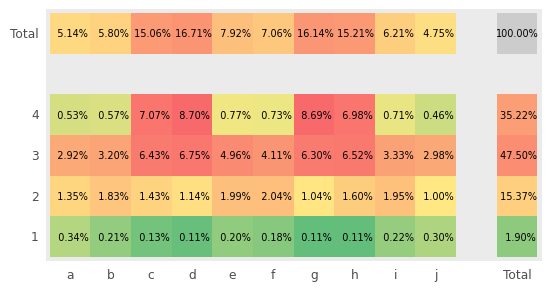

<ggplot: (8747465216609)>


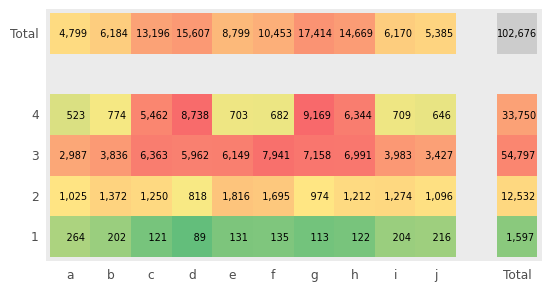

<ggplot: (8747464734745)>


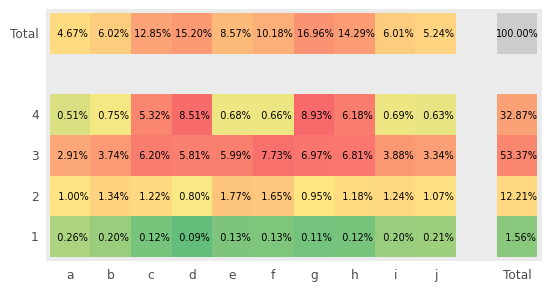

<ggplot: (8747466364745)>


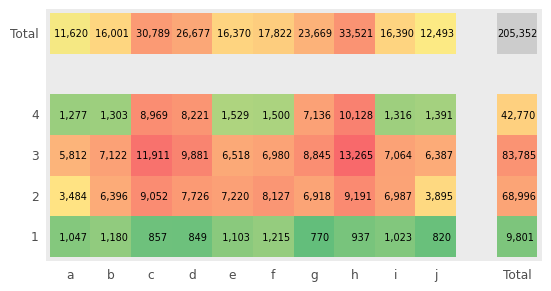

<ggplot: (8747464892423)>


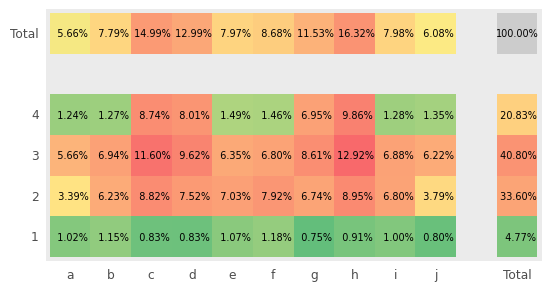

<ggplot: (8747465868186)>


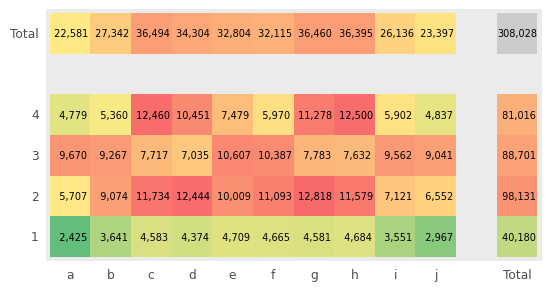

<ggplot: (8747466383493)>


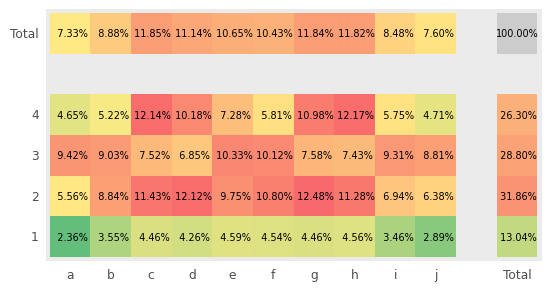

<ggplot: (8747464030781)>


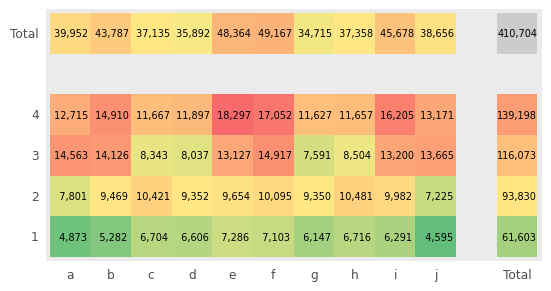

<ggplot: (8747464404706)>


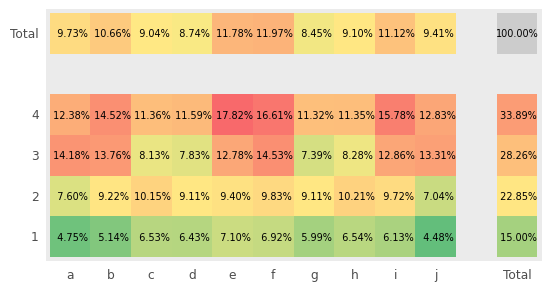

<ggplot: (8747456979658)>


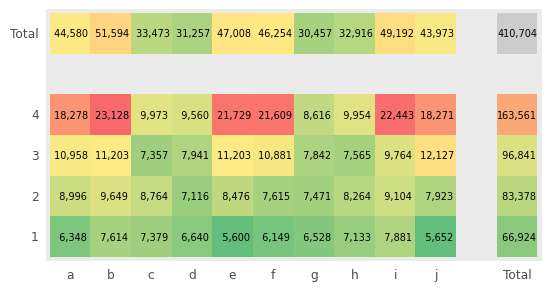

<ggplot: (8747466356182)>


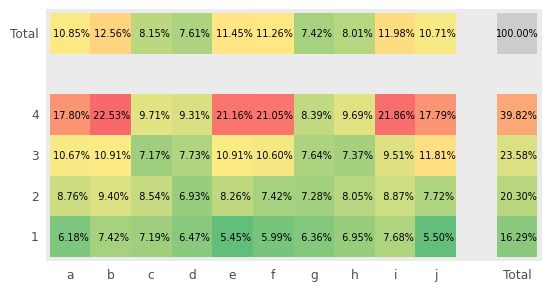

<ggplot: (8747465156831)>


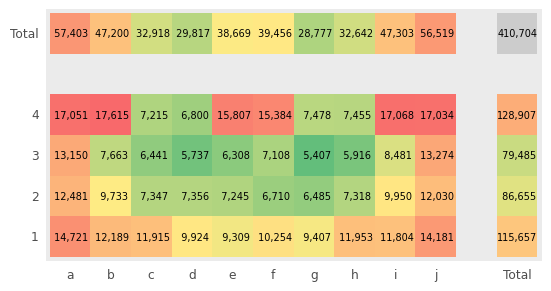

<ggplot: (8747463088884)>


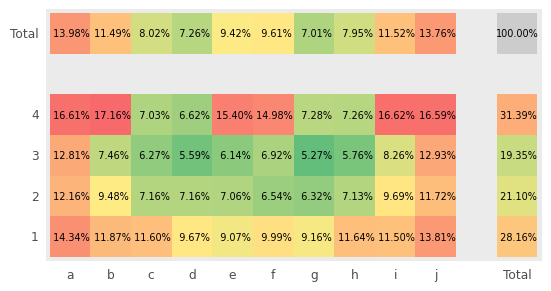

<ggplot: (8747462257234)>


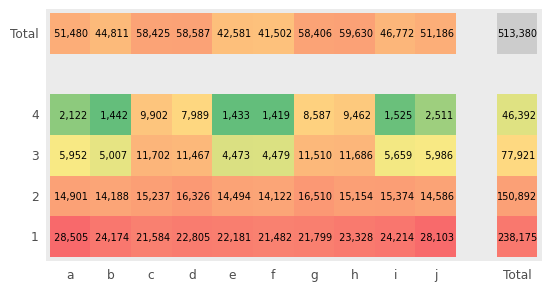

<ggplot: (8747462045248)>


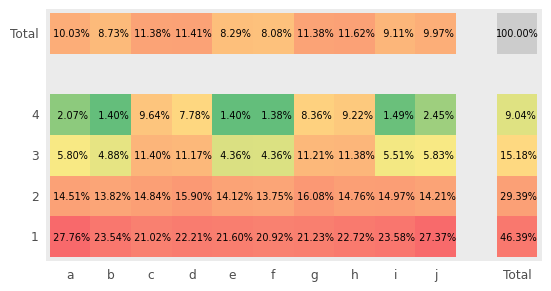

<ggplot: (8747461856775)>


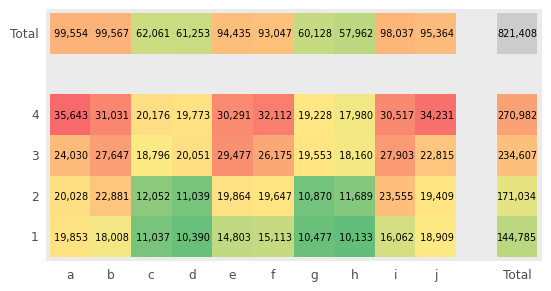

<ggplot: (8747462087443)>


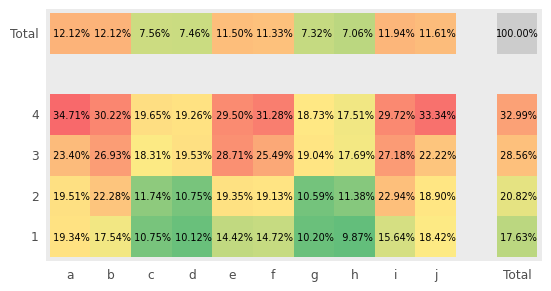

<ggplot: (8747461410350)>


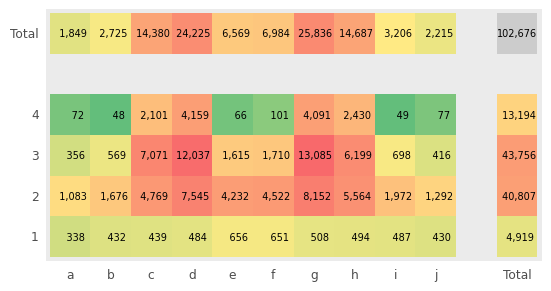

<ggplot: (8747461218356)>


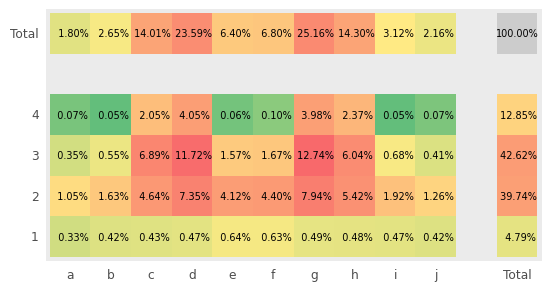

<ggplot: (8747461177655)>


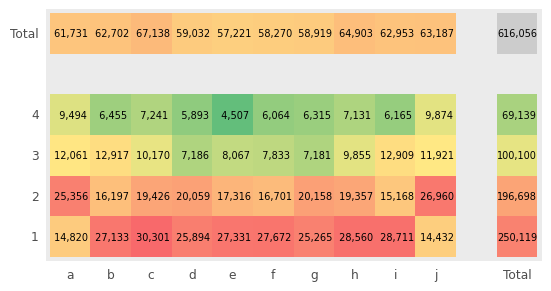

<ggplot: (8747461192921)>


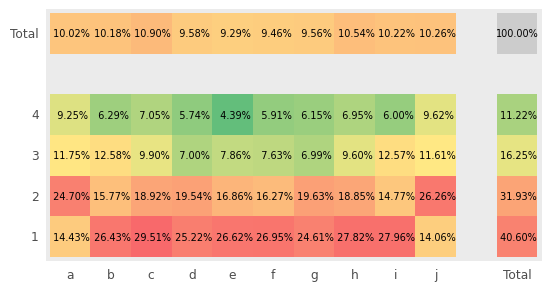

<ggplot: (8747464308357)>


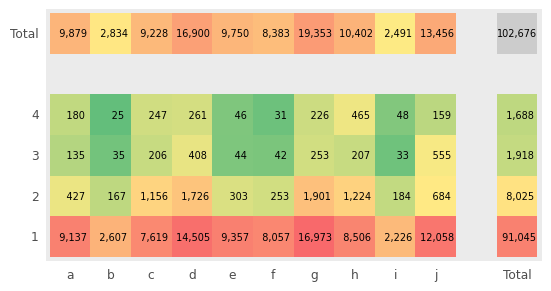

<ggplot: (8747460554093)>


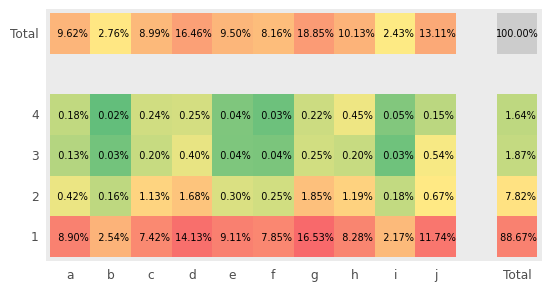

<ggplot: (8747465385479)>


In [5]:
print(f'The charts below show Classic Stratego piece placements from {classic.shape[0]:,} setups.\n')
for r in ranks:
    display(HTML(f'<h3>Classic Stratego {rank_names[r].capitalize()} Placement</h3>'))
    print(setup_heatmap1( sum[r], format_string='{:>7,}',   normalize=False))
    print(setup_heatmap1(mean[r], format_string='{:>7.2%}', normalize=True ))

## 3. Extensions 

### a) Differences between 2003-2006 and 2013-2015

The Gravon database of Stratego games can be divided into two epochs: the period 2003-2006 and the period 2013-2015. Games in other periods are not available for download. We can plot the ratios of piece placement percentages for each piece and each square in the setup area. Some interesting patterns emerge: e.g. there were 3-4 times more setups with a corner marshal (on a1 or j1 for red) in the later period 2013-2015 than in the earlier period 2003-2006.

In [6]:
from gravon.plots import setup_heatmap2

classic_old = classic.query('period <= "2006-07"')
classic_new = classic.query('period >= "2013-10"')
mean_old = setup_placement(classic_old, 'mean')
mean_new = setup_placement(classic_new, 'mean')

The charts below compare Stratego piece placements from 72,700 and 29,976 setups, respectively.



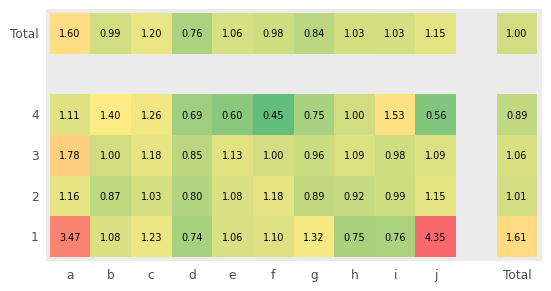

<ggplot: (8747465769638)>


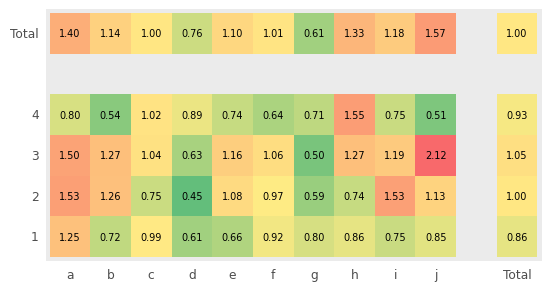

<ggplot: (8747453734635)>


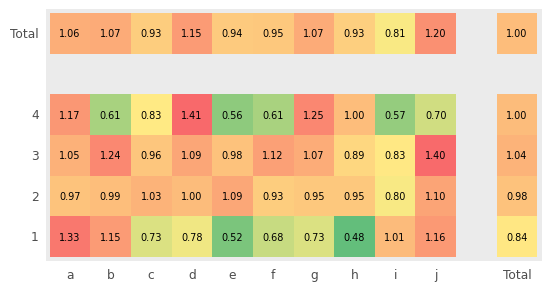

<ggplot: (8747465769590)>


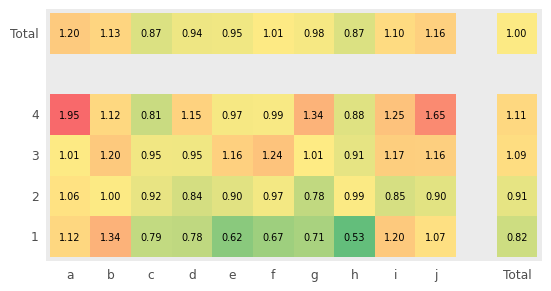

<ggplot: (8747465188389)>


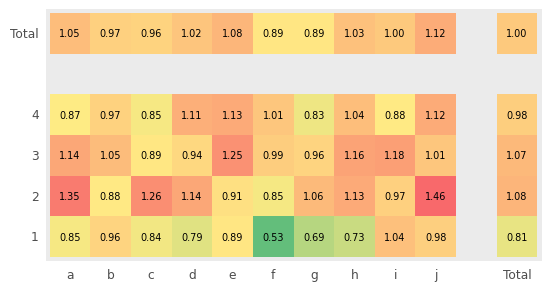

<ggplot: (8747466489965)>


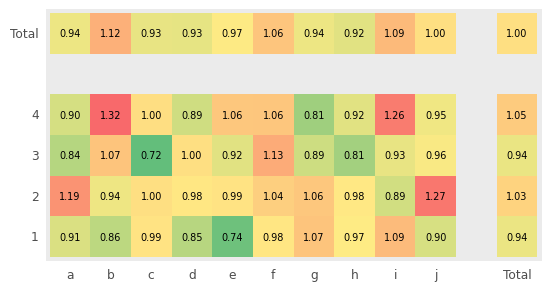

<ggplot: (8747464365617)>


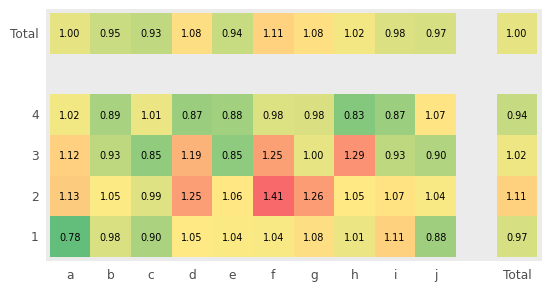

<ggplot: (8747463111671)>


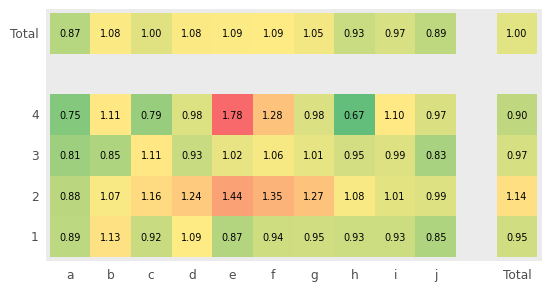

<ggplot: (8747464261774)>


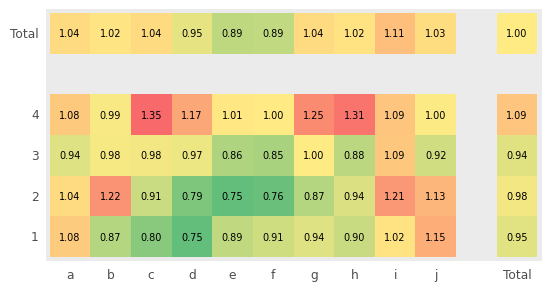

<ggplot: (8747460237406)>


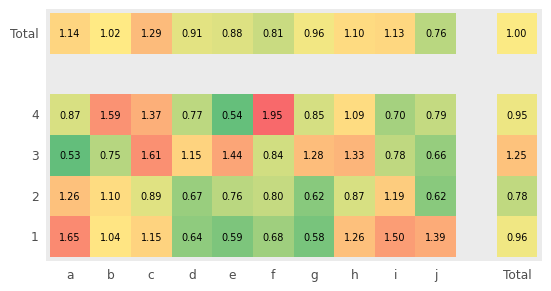

<ggplot: (8747460257868)>


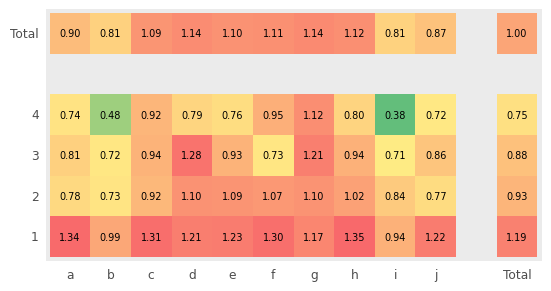

<ggplot: (8747461605837)>


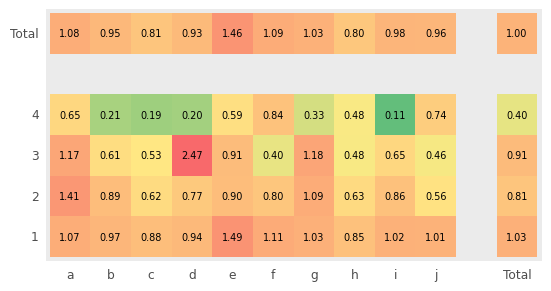

<ggplot: (8747461679364)>


In [7]:
print(f'The charts below compare Stratego piece placements from {classic_old.shape[0]:,} and {classic_new.shape[0]:,} setups, respectively.\n')
for r in ranks:
    display(HTML(f'<h3>Relative Changes in Classic Stratego {rank_names[r].capitalize()} Placement</h3>'))
    print(setup_heatmap2(mean_new[r], mean_old[r], format_string='{:.2f}', normalize=False))

### b) Mutual corner marshals

In [8]:
import gravon.archive as archive
import gravon.pattern as pattern

corner_marshal = (
    """
    ..........
    ..........
    ..........
    X.........
    """
)
df = pattern.match(classic, corner_marshal, mirrored=True)
mutual_corner_marshals = (df
    .groupby(['gid', 'filename'])
    .agg(**{'size': ('gid', 'count')})
    .query('size > 1')
    .reset_index()
    .filename
    .tolist()
)

In [9]:
print(f'In the following {len(mutual_corner_marshals):,} games both players had a corner marshal:')
print('\n'.join(mutual_corner_marshals))
archive.make_zip(mutual_corner_marshals, 'mutual_corner_marshals')

In the following 2 games both players had a corner marshal:
classic-2014.5-2437.xml
classic-2014.10-2531.xml


### c) Barrage Stratego

Barrage Stratego is a shorter version of the classic game with only 8 pieces each.

In [10]:
barrage = db_setups.query('type == "barrage"')
sum, mean = setup_placement(barrage, ['sum', 'mean'])
ranks = [ Rank._X, Rank._9, Rank._3, Rank._2, Rank._1, Rank._B, Rank._F ]

The charts below show Barrage Stratego piece placements from 6,264 setups.



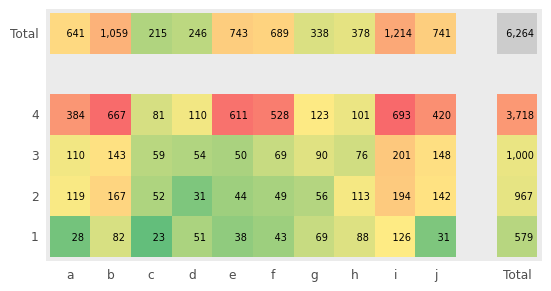

<ggplot: (8747464017677)>


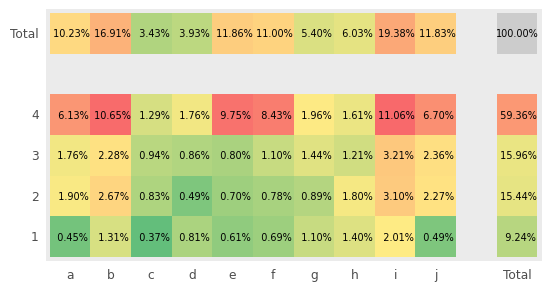

<ggplot: (8747462286818)>


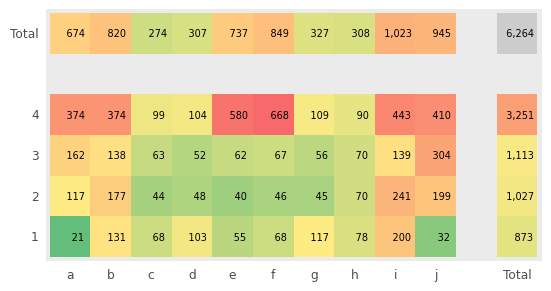

<ggplot: (8747466272693)>


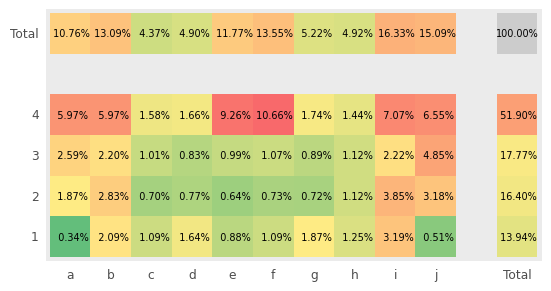

<ggplot: (8747461863099)>


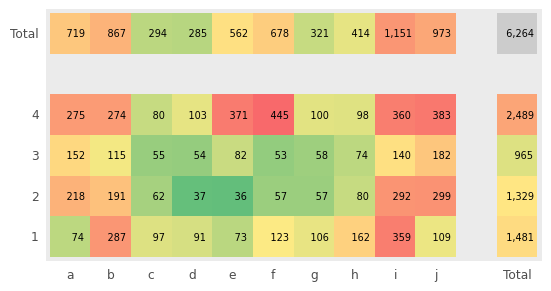

<ggplot: (8747463956152)>


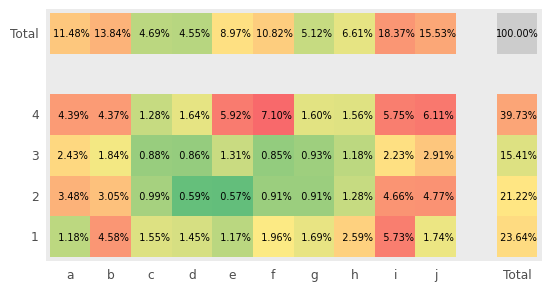

<ggplot: (8747463956164)>


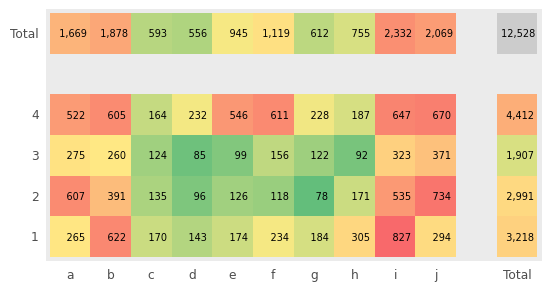

<ggplot: (8747460704919)>


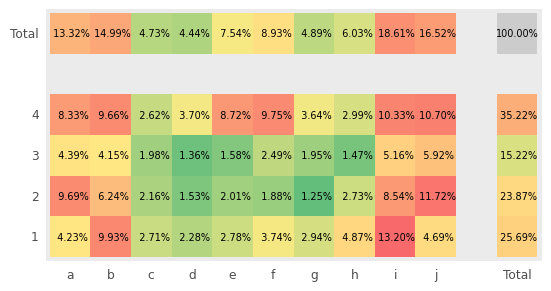

<ggplot: (8747461535452)>


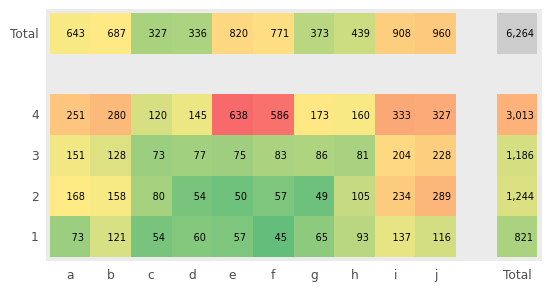

<ggplot: (8747461957000)>


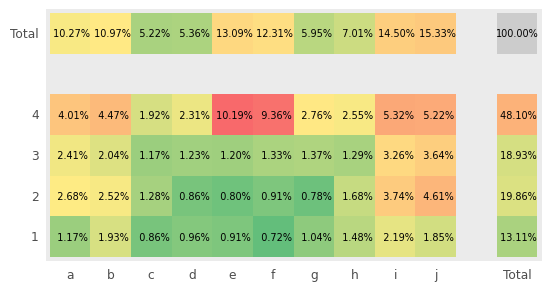

<ggplot: (8747461911275)>


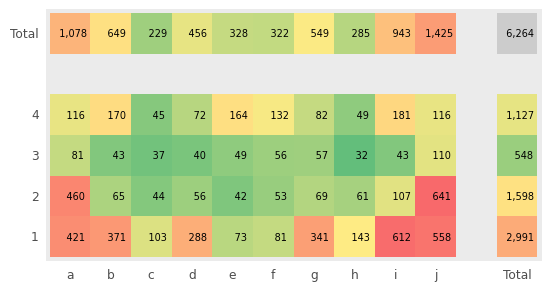

<ggplot: (8747464273719)>


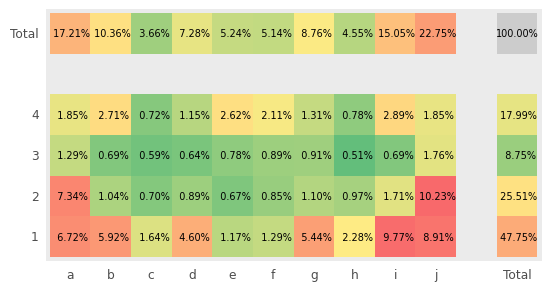

<ggplot: (8747462949861)>


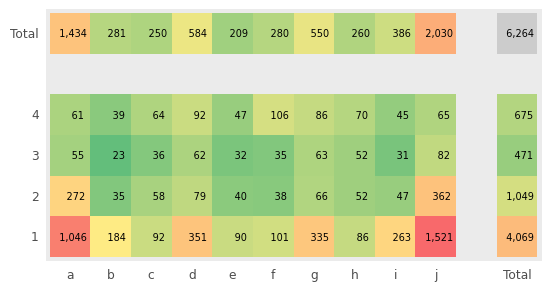

<ggplot: (8747465537226)>


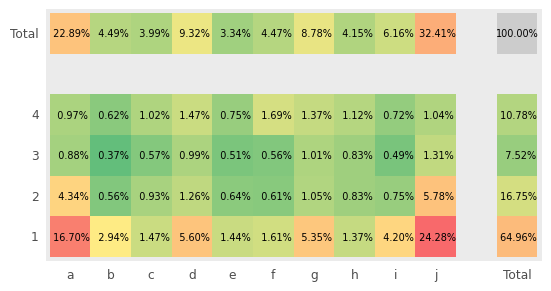

<ggplot: (8747465549388)>


In [11]:
print(f'The charts below show Barrage Stratego piece placements from {barrage.shape[0]:,} setups.\n')
for r in ranks:
    display(HTML(f'<h3>Barrage Stratego {rank_names[r].capitalize()} Placement</h3>'))
    print(setup_heatmap1( sum[r], format_string='{:>7,}',   normalize=False))
    print(setup_heatmap1(mean[r], format_string='{:>7.2%}', normalize=True ))